

#**DNN, CNN & PNN (Wine, Iris)**

Machine Learning

Name: Rosalinda Muñoz Gámez

UASLP code: 303997

Gen 2021, Fac. Code: 202112300357

October 28th, 2024

# DNN and **CNN**

In [33]:

# base imports
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# data preparation and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# metrics and evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# decision tree
from sklearn import tree

# naive bayes
from sklearn.naive_bayes import GaussianNB

# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay # visualization

# SVMs
from sklearn import svm
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from matplotlib.colors import Normalize

# DNNs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# CNNs
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# PNNs
# homebrewed

# Decision Tree

***Iris dataset***

80/20

In [12]:
class Classifier:

    def __init__(self, name, accuracy, confusion_matrix, report):

        self.name = name
        self.accuracy = accuracy
        self.confusion_matrix = confusion_matrix
        self.report = report

iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

x_train80, x_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2)
x_train50, x_test50, y_train50, y_test50 = train_test_split(X, y, test_size=0.5)


[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



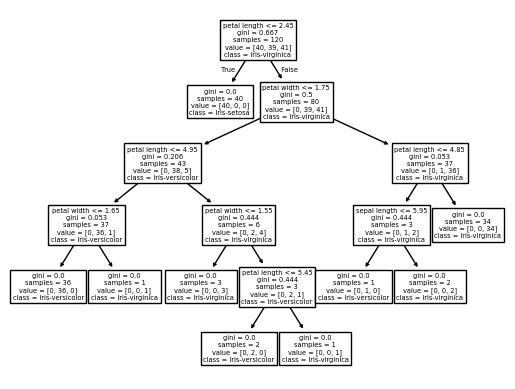

In [13]:
model = tree.DecisionTreeClassifier()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

tree.plot_tree(model, feature_names = iris.data.headers, class_names = np.unique(y))

iris_tree_8020 = Classifier('Decision Tree 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

50/50

[[25  0  0]
 [ 0 20  1]
 [ 0  9 20]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       0.69      0.95      0.80        21
 Iris-virginica       0.95      0.69      0.80        29

       accuracy                           0.87        75
      macro avg       0.88      0.88      0.87        75
   weighted avg       0.89      0.87      0.87        75



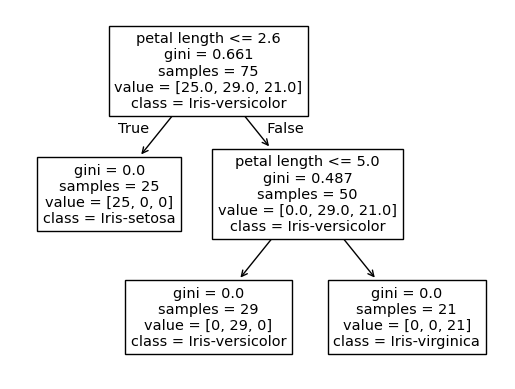

In [14]:
model = tree.DecisionTreeClassifier()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

tree.plot_tree(model, feature_names = iris.data.headers, class_names = np.unique(y))

iris_tree_5050 = Classifier('Decision Tree 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

# Naive Bayes
80/20

In [15]:
model = GaussianNB()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

iris_bayes_8020 = Classifier('Naïve-Bayes 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



50/50

In [16]:
model = GaussianNB()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

iris_bayes_5050 = Classifier('Naïve-Bayes 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

[[25  0  0]
 [ 0 19  2]
 [ 0  3 26]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        25
Iris-versicolor       0.86      0.90      0.88        21
 Iris-virginica       0.93      0.90      0.91        29

       accuracy                           0.93        75
      macro avg       0.93      0.93      0.93        75
   weighted avg       0.93      0.93      0.93        75



# Wine Dataset


In [17]:
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

wine.metadata

{'uci_id': 109,
 'name': 'Wine',
 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine',
 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv',
 'abstract': 'Using chemical analysis to determine the origin of wines',
 'area': 'Physics and Chemistry',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 178,
 'num_features': 13,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1992,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C5PC7J',
 'creators': ['Stefan Aeberhard', 'M. Forina'],
 'intro_paper': {'ID': 246,
  'type': 'NATIVE',
  'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings',
  'authors': 'S. Aeberhard, D. Coomans, O. Vel',
  'venue': 'Pattern Recognition',
  'year': 1994,
  'journal': None,
  'DOI': '10.1016/003

In [18]:
x_train50, x_test50, y_train50, y_test50 = train_test_split(X, y, test_size=0.5)
x_train80, x_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2)

# Decision Tree
80/20

[[10  2  0]
 [ 0 12  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.86      0.92      0.89        13
           3       0.92      1.00      0.96        11

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



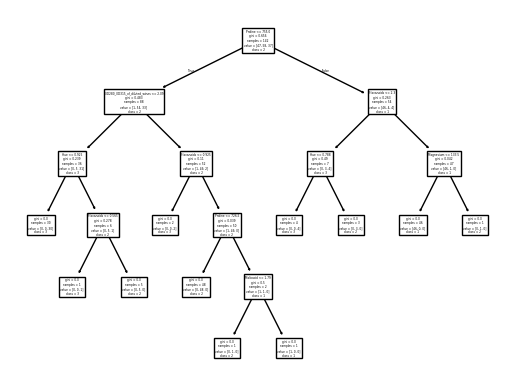

In [19]:
model = tree.DecisionTreeClassifier()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

tree.plot_tree(model, feature_names = wine.data.headers, class_names = ['1', '2', '3'])

wine_tree_8020 = Classifier('Decision Tree 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

50/50

[[31  2  0]
 [ 0 35  1]
 [ 0  3 17]]
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        33
           2       0.88      0.97      0.92        36
           3       0.94      0.85      0.89        20

    accuracy                           0.93        89
   macro avg       0.94      0.92      0.93        89
weighted avg       0.94      0.93      0.93        89



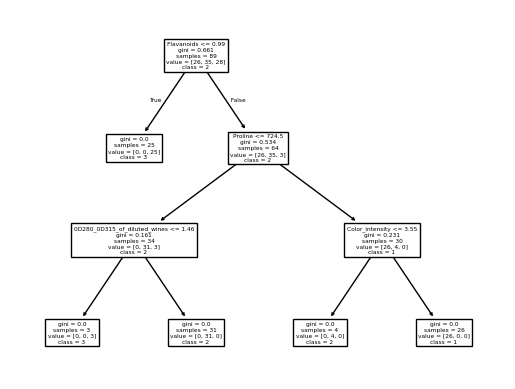

In [20]:
model = tree.DecisionTreeClassifier()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

tree.plot_tree(model, feature_names = wine.data.headers, class_names = ['1', '2', '3'])

wine_tree_5050 = Classifier('Decision Tree 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

# Naive Bayes


In [21]:
model = GaussianNB()

model.fit(x_train80, y_train80.to_numpy().ravel())

model_pred = model.predict(x_test20)

print(confusion_matrix(y_test20, model_pred))
print(classification_report(y_test20, model_pred))

wine_bayes_8020 = Classifier('Naïve-Bayes 80/20', accuracy_score(y_test20, model_pred), confusion_matrix(y_test20, model_pred), classification_report(y_test20, model_pred))

[[12  0  0]
 [ 0 12  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.92      0.96        13
           3       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [22]:
model = GaussianNB()

model.fit(x_train50, y_train50.to_numpy().ravel())

model_pred = model.predict(x_test50)

print(confusion_matrix(y_test50, model_pred))
print(classification_report(y_test50, model_pred))

wine_bayes_5050 = Classifier('Naïve-Bayes 50/50', accuracy_score(y_test50, model_pred), confusion_matrix(y_test50, model_pred), classification_report(y_test50, model_pred))

[[31  2  0]
 [ 0 36  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        33
           2       0.95      1.00      0.97        36
           3       1.00      1.00      1.00        20

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



# **DNN**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
def build_dnn(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # Softmax para clasificación multiclase
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

IRIS 80/20

In [25]:
iris_dnn_model = build_dnn(input_dim=x_train80.shape[1], output_dim=len(np.unique(y)))
iris_dnn_model.fit(x_train80, y_train80, epochs=50, batch_size=16, verbose=1)

dnn_pred = np.argmax(iris_dnn_model.predict(x_test20), axis=1)
print(confusion_matrix(y_test20, dnn_pred))
print(classification_report(y_test20, dnn_pred))

iris_dnn_8020 = Classifier('DNN 80/20', accuracy_score(y_test20, dnn_pred), confusion_matrix(y_test20, dnn_pred), classification_report(y_test20, dnn_pred))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4054 - loss: 40.8900
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2721 - loss: 17.4242  
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3484 - loss: 12.6457 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1783 - loss: 5.9577 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2696 - loss: 3.1336 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3866 - loss: 1.6564 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4485 - loss: 1.6558 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5674 - loss: 1.2101 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6396 - loss: 0.9562 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6855 - loss: 0.8928 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - loss: 0.8014 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 1.0027 
Epoch 13/

50/50

In [26]:
iris_dnn_model = build_dnn(input_dim=x_train50.shape[1], output_dim=len(np.unique(y)))

y_train50 = y_train50.astype(int)
y_test50 = y_test50.astype(int)

iris_dnn_model.fit(x_train50, y_train50, epochs=50, batch_size=16, verbose=1)

dnn_pred = np.argmax(iris_dnn_model.predict(x_test50), axis=1)
print("Confusion Matrix (Iris 50/50):")
print(confusion_matrix(y_test50, dnn_pred))
print("Classification Report (Iris 50/50):")
print(classification_report(y_test50, dnn_pred))

iris_dnn_5050 = Classifier('DNN 50/50', accuracy_score(y_test50, dnn_pred), confusion_matrix(y_test50, dnn_pred), classification_report(y_test50, dnn_pred))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3553 - loss: 27.5187
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5804 - loss: 5.3858 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5337 - loss: 8.2917 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5745 - loss: 2.7982 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4921 - loss: 3.3397 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5410 - loss: 3.0095  
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5251 - loss: 1.7858 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5586 - loss: 1.3635  
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6330 - loss: 1.4428 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6864 - loss: 1.2110 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5417 - loss: 1.4666  
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7038 - loss: 1.0883 
Epoch 13/

WINE 80/20

In [27]:
wine_dnn_model = build_dnn(input_dim=x_train80.shape[1], output_dim=len(np.unique(y)))

wine_dnn_model.fit(x_train80, y_train80, epochs=50, batch_size=16, verbose=1)

dnn_pred = np.argmax(wine_dnn_model.predict(x_test20), axis=1)
print(confusion_matrix(y_test20, dnn_pred))
print(classification_report(y_test20, dnn_pred))

wine_dnn_8020 = Classifier('DNN 80/20', accuracy_score(y_test20, dnn_pred), confusion_matrix(y_test20, dnn_pred), classification_report(y_test20, dnn_pred))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 219.8316
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1316 - loss: 81.2691      
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2961 - loss: 18.3750 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4785 - loss: 8.8677 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4007 - loss: 6.1306 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3873 - loss: 2.9369 
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 1.6510 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6805 - loss: 1.0283 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5587 - loss: 1.3733 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6077 - loss: 1.0625 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6967 - loss: 0.8558 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7234 - loss: 0.7230 


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[10  2  0]
 [ 0 13  0]
 [ 1  6  4]]
              precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           2       0.62      1.00      0.76        13
           3       1.00      0.36      0.53        11

    accuracy                           0.75        36
   macro avg       0.84      0.73      0.72        36
weighted avg       0.83      0.75      0.73        36



50/50

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3213 - loss: 115.5833
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2522 - loss: 43.0957 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2550 - loss: 13.9232 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5001 - loss: 5.5810 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5959 - loss: 4.6383 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6009 - loss: 2.3491 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5639 - loss: 1.8478 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - loss: 2.0854 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4985 - loss: 1.2421 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 1.3968 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5416 - loss: 1.0844 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - loss: 1.1859 
Epoch 13/

IRIS DATASET COMPARISON
80/20 & 50/50

In [ ]:
models = [iris_tree_8020, iris_bayes_8020, iris_knn_8020, iris_dnn_8020]
data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}
table_iris_8020 = pd.DataFrame(data)
table_iris_8020

In [ ]:
models = [iris_tree_5050, iris_bayes_5050, iris_knn_5050, iris_dnn_5050]
data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}
table_iris_5050 = pd.DataFrame(data)
table_iris_5050

WINE DATASET COMPARISON
80/20 &50/50

In [ ]:
models = [wine_tree_8020, wine_bayes_8020, wine_knn_8020, wine_dnn_8020]
data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}
table_wine_8020 = pd.DataFrame(data)
table_wine_8020


models = [wine_tree_5050, wine_bayes_5050, wine_knn_5050, wine_dnn_5050]
data = {
    'Model': [m.name for m in models],
    'Accuracy': [m.accuracy for m in models],
}
table_wine_5050 = pd.DataFrame(data)
table_wine_5050

# **CNN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine, load_iris


In [ ]:
def load_and_preprocess_data(dataset):
    if dataset == 'wine':
        data = load_wine()
    elif dataset == 'iris':
        data = load_iris()
    X = data.data
    y = data.target

    # Normalización
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Reshape para usar en la CNN
    X = X.reshape(X.shape[0], X.shape[1], 1, 1)

    return X, y

X, y = load_and_preprocess_data('wine')  # O 'iris' para cambiar el dataset


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X.shape[1], 1)  # La segunda dimensión es solo el número de características
model = create_cnn_model(input_shape, num_classes)



In [ ]:
# División 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# División 50%-50%
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.5, random_state=42)


In [ ]:
# Entrenamiento y evaluación para la división 80%-20%
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
y_pred = model.predict(X_test).argmax(axis=1)
print("Confusion Matrix (80-20 Split):\n", confusion_matrix(y_test, y_pred))
print("Classification Report (80-20 Split):\n", classification_report(y_test, y_pred))

# Entrenamiento y evaluación para la división 50%-50%
history_50 = model.fit(X_train_50, y_train_50, epochs=10, validation_data=(X_test_50, y_test_50))
y_pred_50 = model.predict(X_test_50).argmax(axis=1)
print("Confusion Matrix (50-50 Split):\n", confusion_matrix(y_test_50, y_pred_50))
print("Classification Report (50-50 Split):\n", classification_report(y_test_50, y_pred_50))


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.2586 - loss: 1.1953 - val_accuracy: 0.4722 - val_loss: 0.9974
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5740 - loss: 0.9501 - val_accuracy: 0.8056 - val_loss: 0.8420
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7916 - loss: 0.7791 - val_accuracy: 0.8333 - val_loss: 0.7173
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8302 - loss: 0.6689 - val_accuracy: 0.8611 - val_loss: 0.5876
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8906 - loss: 0.5574 - val_accuracy: 0.9167 - val_loss: 0.4735
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8979 - loss: 0.4413 - val_accuracy: 0.9722 - val_loss: 0.3787
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9044 - loss: 0.3895 - val_accuracy: 0.9722 - val_loss: 0.3045
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9183 - loss: 0.3257 - val_accuracy: 0.9722 - val_loss: 0.2532


# **PNN**


In [34]:
class Classifier:

    def __init__(self, name, accuracy, confusion_matrix, report):

        self.name = name
        self.accuracy = accuracy
        self.confusion_matrix = confusion_matrix
        self.report = report


# for SVMs

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# PNNs (from https://github.com/verowulf/PNN)

# Probabilistic Neural Network with 4 layers
class PNN(object):
    def __init__(self):
        self.L2 = []    # Layer 2 that holds the patterns
        print('Empty PNN created.')

    def train(self, X, y, p=2):
        self.n_ = X.shape[1]  # num of features
        self.p_ = p           # num of classes

        # Layer 2 (Pattern): Set up empty lists for each class
        for k in range(self.p_):
            self.L2.append([])    # Using Python's basic lists because ndarray cannot append empty arrays
                                  # Also perhaps we might have to input different data types

        # Enter patterns into Layer 2
        for i in range(X.shape[0]):
            self.L2[y[i]].append(X[i])

        # self.L2 = np.array(self.L2)    # Change to ndarray for speed (Is this faster?)

        print('PNN with %d classes trained.' % self.p_)

    def cross_validate(self, X, y, sigma=0.5):
        result = self.predict(X, sigma)
        num_correct = sum(result[:, 0] == y)

        print('Cross validation accuracy with sigma %.2f: %.1f%%' % (sigma, num_correct/len(y) * 100))

        return num_correct/len(y)

    def predict(self, X, sigma=0.5):
        m = X.shape[0]
        accL3 = np.zeros((m, self.p_))
        accL4 = np.zeros(m)

        self.sigma_ = sigma    # smoothing parameter, not standard deviation
        self.C1_ = 2 * self.sigma_**2
        C2_ = (math.sqrt(2*math.pi) * self.sigma_) ** (- self.n_)

        # Layer 1 (Input): x
        for i in range(m):
            x = X[i]

            # Layer 3 (Averaging): for each class
            self.L3_ = np.zeros(self.p_)
            for k in range(self.p_):
                for ki in range(len(self.L2[k])):
                    self.L3_[k] += self._activation(x, self.L2[k][ki])
                self.L3_[k] /= len(self.L2[k])

                # Multiply constant
                self.L3_[k] *= C2_
                accL3[i][k] = self.L3_[k]

            # Layer 4 (Output/Decision): Maxing
            self.L4_ = self.L3_.argmax()
            accL4[i] = self.L4_

        return np.column_stack((accL4, accL3))

    def _activation(self, x, w):
        diff = x - w
        return math.exp( - np.dot(diff, diff) / self.C1_ )


# Normalize to unit length: [0, 1]
# X must be ndarray
def normalize(X):
    x_max = X.max(axis=0)
    x_min = X.min(axis=0)
    return (X - x_min) / (x_max - x_min)

In [35]:
#preprocessing
label_encoder = LabelEncoder()

IRIS DATASET
50/50 & 80/20

In [36]:
y_train80_ord = label_encoder.fit_transform(y_train80)
y_test20_ord = label_encoder.fit_transform(y_test20)
x_train80_norm = normalize(x_train80.to_numpy())
x_test20_norm = normalize(x_test20.to_numpy())

pnn = PNN()
pnn.train(x_train80_norm, y_train80_ord, p=3)

best = 0
best_s = 0

begin = 0.01
end = 0.20
step = 0.01

print()

s = begin
while s < end + step:
    acc = pnn.cross_validate(x_test20_norm, y_test20_ord, sigma=s)
    if best < acc:
        best = acc
        best_s = s
    s += step

print()

model_pred = pnn.predict(x_test20_norm, best_s)[:, 0]
print(confusion_matrix(y_test20_ord, model_pred))
print(classification_report(y_test20_ord, model_pred))

iris_PNN_8020 = Classifier(f'PNN 80/20', accuracy_score(y_test20_ord, model_pred), confusion_matrix(y_test20_ord, model_pred), classification_report(y_test20_ord, model_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Empty PNN created.
PNN with 3 classes trained.

Cross validation accuracy with sigma 0.01: 93.3%
Cross validation accuracy with sigma 0.02: 93.3%
Cross validation accuracy with sigma 0.03: 93.3%
Cross validation accuracy with sigma 0.04: 93.3%
Cross validation accuracy with sigma 0.05: 93.3%
Cross validation accuracy with sigma 0.06: 93.3%
Cross validation accuracy with sigma 0.07: 93.3%
Cross validation accuracy with sigma 0.08: 93.3%
Cross validation accuracy with sigma 0.09: 93.3%
Cross validation accuracy with sigma 0.10: 93.3%
Cross validation accuracy with sigma 0.11: 93.3%
Cross validation accuracy with sigma 0.12: 93.3%
Cross validation accuracy with sigma 0.13: 93.3%
Cross validation accuracy with sigma 0.14: 93.3%
Cross validation accuracy with sigma 0.15: 93.3%
Cross validation accuracy with sigma 0.16: 93.3%
Cross validation accuracy with sigma 0.17: 90.0%
Cross validation accuracy with sigma 0.18: 90.0%
Cross validation accuracy with sigma 0.19: 90.0%
Cross validation accu

In [39]:

# Ensure y_train50 and y_test50 are 1-dimensional arrays and encode them
y_train50_ord = label_encoder.fit_transform(y_train50)
y_test50_ord = label_encoder.transform(y_test50)

# Normalize training and test data
def normalize(X):
    x_max = X.max(axis=0)
    x_min = X.min(axis=0)
    return (X - x_min) / (x_max - x_min)

x_train50_norm = normalize(x_train50.to_numpy())
x_test50_norm = normalize(x_test50.to_numpy())

# Define and train the PNN
pnn = PNN()
pnn.train(x_train50_norm, y_train50_ord, p=3)

# Variables to store the best sigma and its accuracy
best = 0
best_s = 0

# Range and step for sigma
begin = 0.01
end = 0.20
step = 0.01

print("Searching for the best sigma...")

# Search for the best sigma through cross-validation
s = begin
while s <= end:
    acc = pnn.cross_validate(x_test50_norm, y_test50_ord, sigma=s)
    if best < acc:
        best = acc
        best_s = s
    s += step

print(f"\nBest sigma found: {best_s} with accuracy: {best}")

# Make predictions with the best sigma
model_pred = pnn.predict(x_test50_norm, best_s)[:, 0]

# Print performance metrics
print("Confusion Matrix:\n", confusion_matrix(y_test50_ord, model_pred))
print("Classification Report:\n", classification_report(y_test50_ord, model_pred))

# Save the results in the Classifier class if necessary
iris_PNN_5050 = Classifier(
    f'PNN 50/50',
    accuracy_score(y_test50_ord, model_pred),
    confusion_matrix(y_test50_ord, model_pred),
    classification_report(y_test50_ord, model_pred)
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Empty PNN created.
PNN with 3 classes trained.
Searching for the best sigma...
Cross validation accuracy with sigma 0.01: 90.7%
Cross validation accuracy with sigma 0.02: 90.7%
Cross validation accuracy with sigma 0.03: 90.7%
Cross validation accuracy with sigma 0.04: 90.7%
Cross validation accuracy with sigma 0.05: 92.0%
Cross validation accuracy with sigma 0.06: 92.0%
Cross validation accuracy with sigma 0.07: 92.0%
Cross validation accuracy with sigma 0.08: 92.0%
Cross validation accuracy with sigma 0.09: 92.0%
Cross validation accuracy with sigma 0.10: 92.0%
Cross validation accuracy with sigma 0.11: 93.3%
Cross validation accuracy with sigma 0.12: 92.0%
Cross validation accuracy with sigma 0.13: 92.0%
Cross validation accuracy with sigma 0.14: 92.0%
Cross validation accuracy with sigma 0.15: 92.0%
Cross validation accuracy with sigma 0.16: 92.0%
Cross validation accuracy with sigma 0.17: 92.0%
Cross validation accuracy with sigma 0.18: 93.3%
Cross validation accuracy with sigma 0.

WINE DATASET
80/20 & 50/50

In [40]:
y_train80_ord = label_encoder.fit_transform(y_train80)
y_test20_ord = label_encoder.fit_transform(y_test20)
x_train80_norm = normalize(x_train80.to_numpy())
x_test20_norm = normalize(x_test20.to_numpy())

pnn = PNN()
pnn.train(x_train80_norm, y_train80_ord, p=3)

best = 0
best_s = 0

begin = 0.01
end = 0.20
step = 0.01

print()

s = begin
while s < end + step:
    acc = pnn.cross_validate(x_test20_norm, y_test20_ord, sigma=s)
    if best < acc:
        best = acc
        best_s = s
    s += step

print()

model_pred = pnn.predict(x_test20_norm, best_s)[:, 0]
print(confusion_matrix(y_test20_ord, model_pred))
print(classification_report(y_test20_ord, model_pred))

wine_PNN_8020 = Classifier(f'PNN 80/20', accuracy_score(y_test20_ord, model_pred), confusion_matrix(y_test20_ord, model_pred), classification_report(y_test20_ord, model_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Empty PNN created.
PNN with 3 classes trained.

Cross validation accuracy with sigma 0.01: 93.3%
Cross validation accuracy with sigma 0.02: 93.3%
Cross validation accuracy with sigma 0.03: 93.3%
Cross validation accuracy with sigma 0.04: 93.3%
Cross validation accuracy with sigma 0.05: 93.3%
Cross validation accuracy with sigma 0.06: 93.3%
Cross validation accuracy with sigma 0.07: 93.3%
Cross validation accuracy with sigma 0.08: 93.3%
Cross validation accuracy with sigma 0.09: 93.3%
Cross validation accuracy with sigma 0.10: 93.3%
Cross validation accuracy with sigma 0.11: 93.3%
Cross validation accuracy with sigma 0.12: 93.3%
Cross validation accuracy with sigma 0.13: 93.3%
Cross validation accuracy with sigma 0.14: 93.3%
Cross validation accuracy with sigma 0.15: 93.3%
Cross validation accuracy with sigma 0.16: 93.3%
Cross validation accuracy with sigma 0.17: 90.0%
Cross validation accuracy with sigma 0.18: 90.0%
Cross validation accuracy with sigma 0.19: 90.0%
Cross validation accu

In [41]:
y_train50_ord = label_encoder.fit_transform(y_train50)
y_test50_ord = label_encoder.fit_transform(y_test50)
x_train50_norm = normalize(x_train50.to_numpy())
x_test50_norm = normalize(x_test50.to_numpy())

pnn = PNN()
pnn.train(x_train50_norm, y_train50_ord, p=3)

best = 0
best_s = 0

begin = 0.01
end = 0.20
step = 0.01

print()

s = begin
while s < end + step:
    acc = pnn.cross_validate(x_test50_norm, y_test50_ord, sigma=s)
    if best < acc:
        best = acc
        best_s = s
    s += step

print()

model_pred = pnn.predict(x_test50_norm, best_s)[:, 0]
print(confusion_matrix(y_test50_ord, model_pred))
print(classification_report(y_test50_ord, model_pred))

wine_PNN_5050 = Classifier(f'PNN 50/50', accuracy_score(y_test50_ord, model_pred), confusion_matrix(y_test50_ord, model_pred), classification_report(y_test50_ord, model_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Empty PNN created.
PNN with 3 classes trained.

Cross validation accuracy with sigma 0.01: 90.7%
Cross validation accuracy with sigma 0.02: 90.7%
Cross validation accuracy with sigma 0.03: 90.7%
Cross validation accuracy with sigma 0.04: 90.7%
Cross validation accuracy with sigma 0.05: 92.0%
Cross validation accuracy with sigma 0.06: 92.0%
Cross validation accuracy with sigma 0.07: 92.0%
Cross validation accuracy with sigma 0.08: 92.0%
Cross validation accuracy with sigma 0.09: 92.0%
Cross validation accuracy with sigma 0.10: 92.0%
Cross validation accuracy with sigma 0.11: 93.3%
Cross validation accuracy with sigma 0.12: 92.0%
Cross validation accuracy with sigma 0.13: 92.0%
Cross validation accuracy with sigma 0.14: 92.0%
Cross validation accuracy with sigma 0.15: 92.0%
Cross validation accuracy with sigma 0.16: 92.0%
Cross validation accuracy with sigma 0.17: 92.0%
Cross validation accuracy with sigma 0.18: 93.3%
Cross validation accuracy with sigma 0.19: 93.3%
Cross validation accu